In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data splitting
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv1D, MaxPooling1D

# To suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, classification_report

# Print statement for verification
print("Imports completed successfully.")


Imports completed successfully.


In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Unnamed: 32]
Index: []

[0 rows x 33 columns]


In [10]:
#This means there are no dublicate rows in datasets.

In [11]:
data = data.drop('Unnamed: 32',axis=1)

In [12]:
# count of rows and columns
data.shape

(569, 32)

In [13]:
#Get count of number of M or B cells in diagnosis
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<a> Exploratory Data Analysis (EDA) </a>

<b>Class Distribution</b><br>
Plot the distribution of the target variable ('diagnosis') to understand the balance between malignant and benign cases.

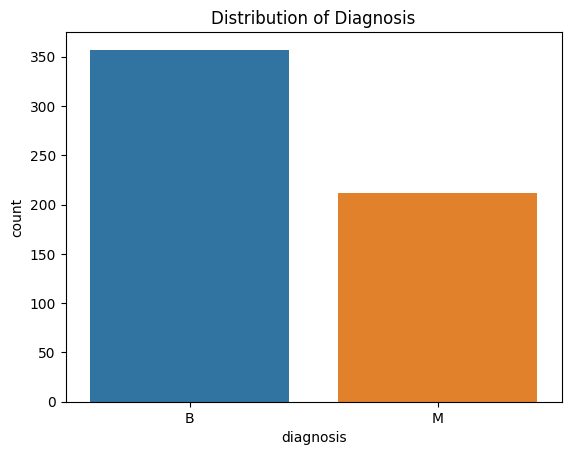

In [14]:
# Plot the distribution of the target variable
sns.countplot(x='diagnosis', data=data, order=data['diagnosis'].value_counts().index)
plt.title('Distribution of Diagnosis')
plt.show()

<b>Correlation Heatmap:</b><br>
Visualize the correlation between numerical features to identify patterns.

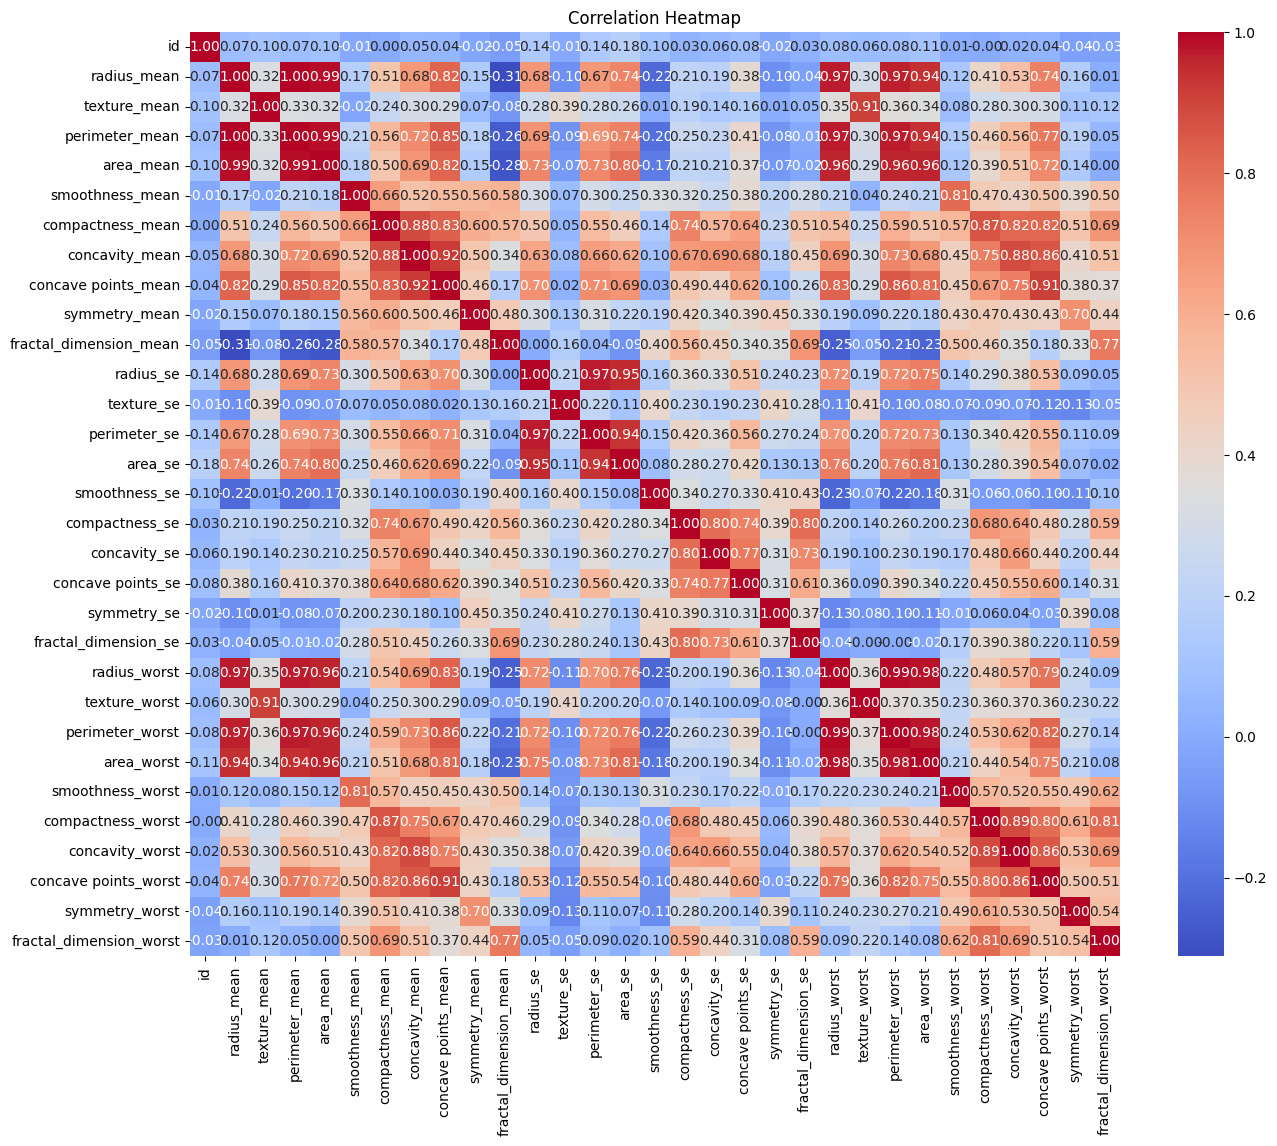

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<b> Boxplots: </b><br>
Use boxplots to visualize the distribution of features for each diagnosis class.

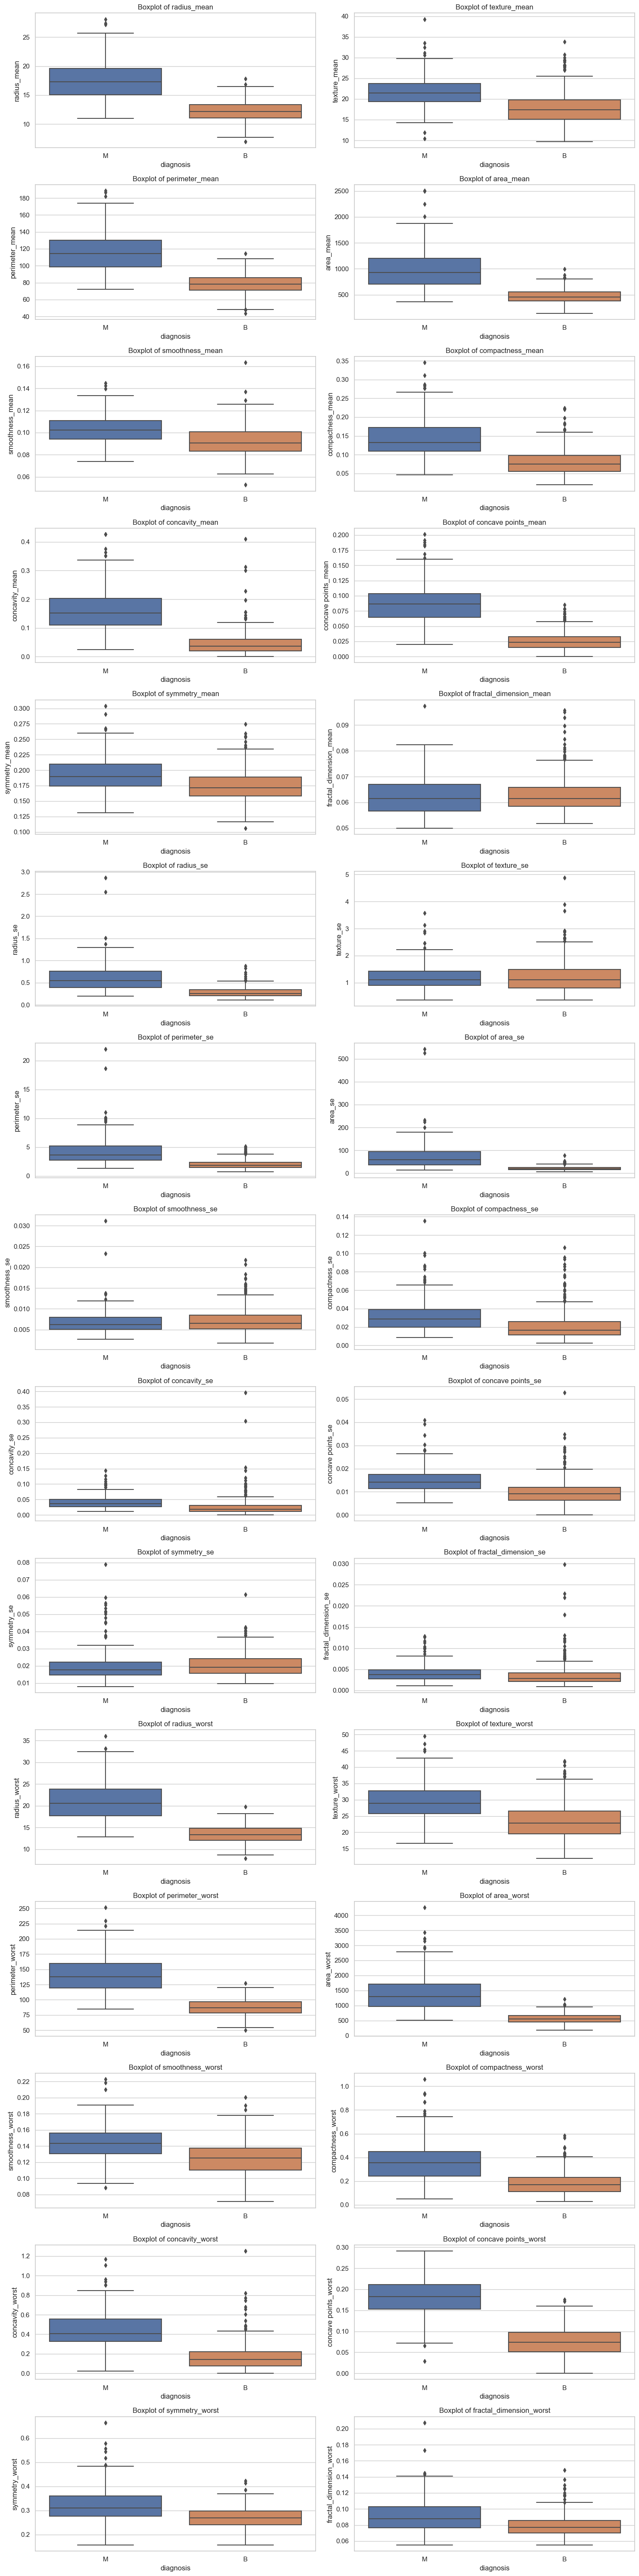

In [16]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Get the number of features
num_features = len(data.columns[2:])
num_rows = (num_features // 2) + (num_features % 2)  # Calculate the number of rows for subplots

# Create a boxplot for each feature grouped by 'diagnosis'
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))
for i, column in enumerate(data.columns[2:]):
    sns.boxplot(x='diagnosis', y=column, data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

<b>Pairplot:<br></b>
Create a pairplot to observe relationships between different features.

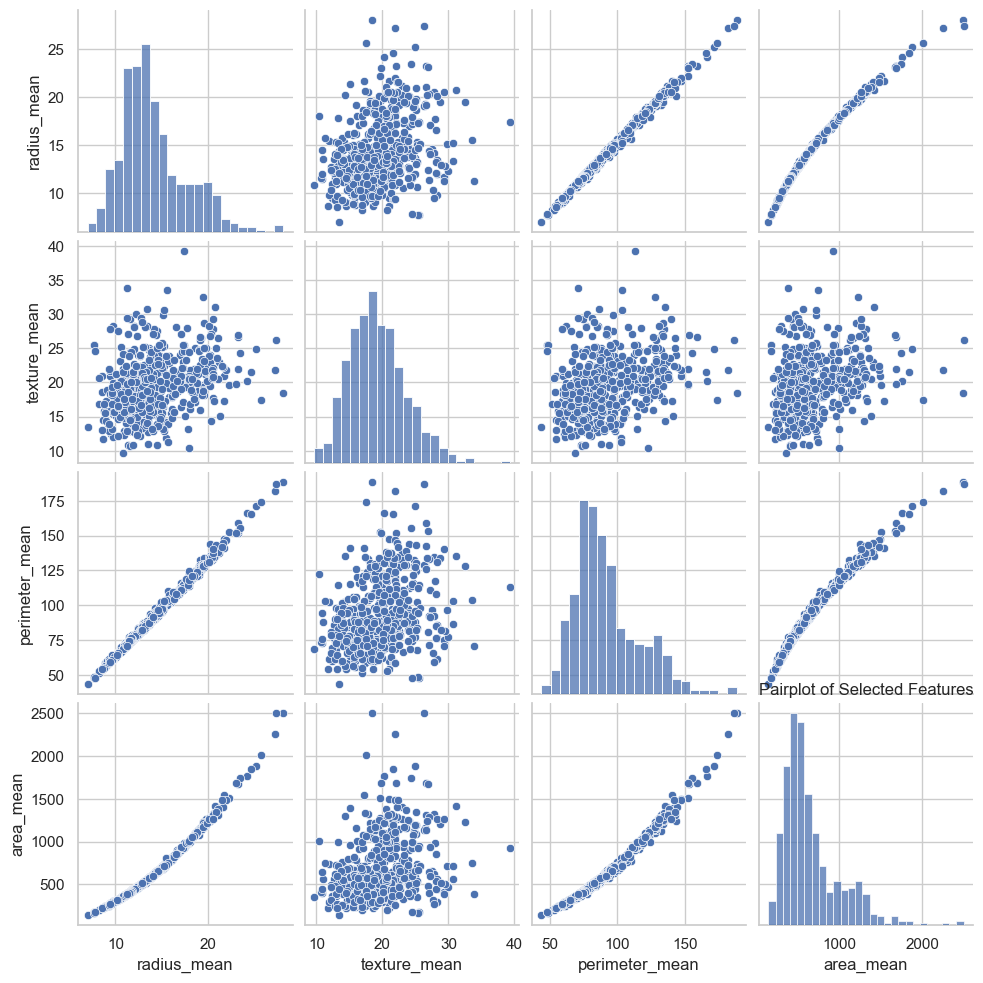

In [17]:
sns.pairplot(data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']])
plt.title('Pairplot of Selected Features')
plt.show()

<b>Violin Plots:<br></b>
Violin plots can be used to show the distribution of data.

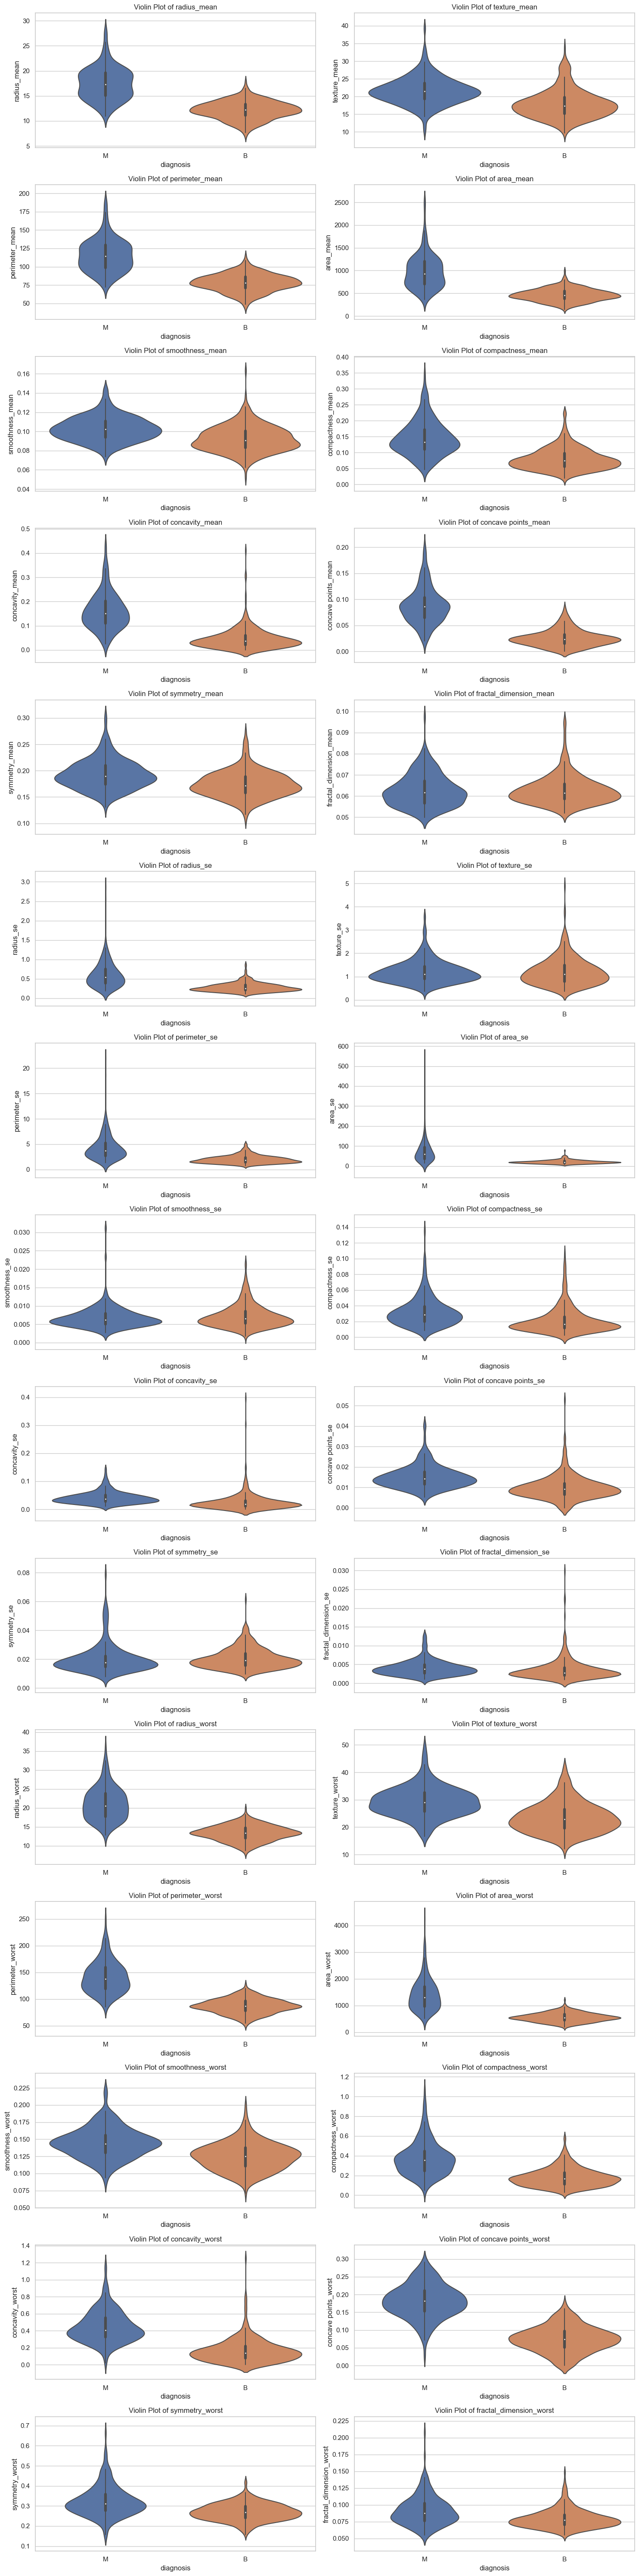

In [18]:
sns.set(style="whitegrid")

# Get the number of features
num_features = len(data.columns[2:])
num_rows = (num_features // 2) + (num_features % 2)  # Calculate the number of rows for subplots

# Create a violin plot for each feature grouped by 'diagnosis'
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))
for i, column in enumerate(data.columns[2:]):
    sns.violinplot(x='diagnosis', y=column, data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

<b>Histograms:</b><br>
Display histograms for individual features to understand their distribution.

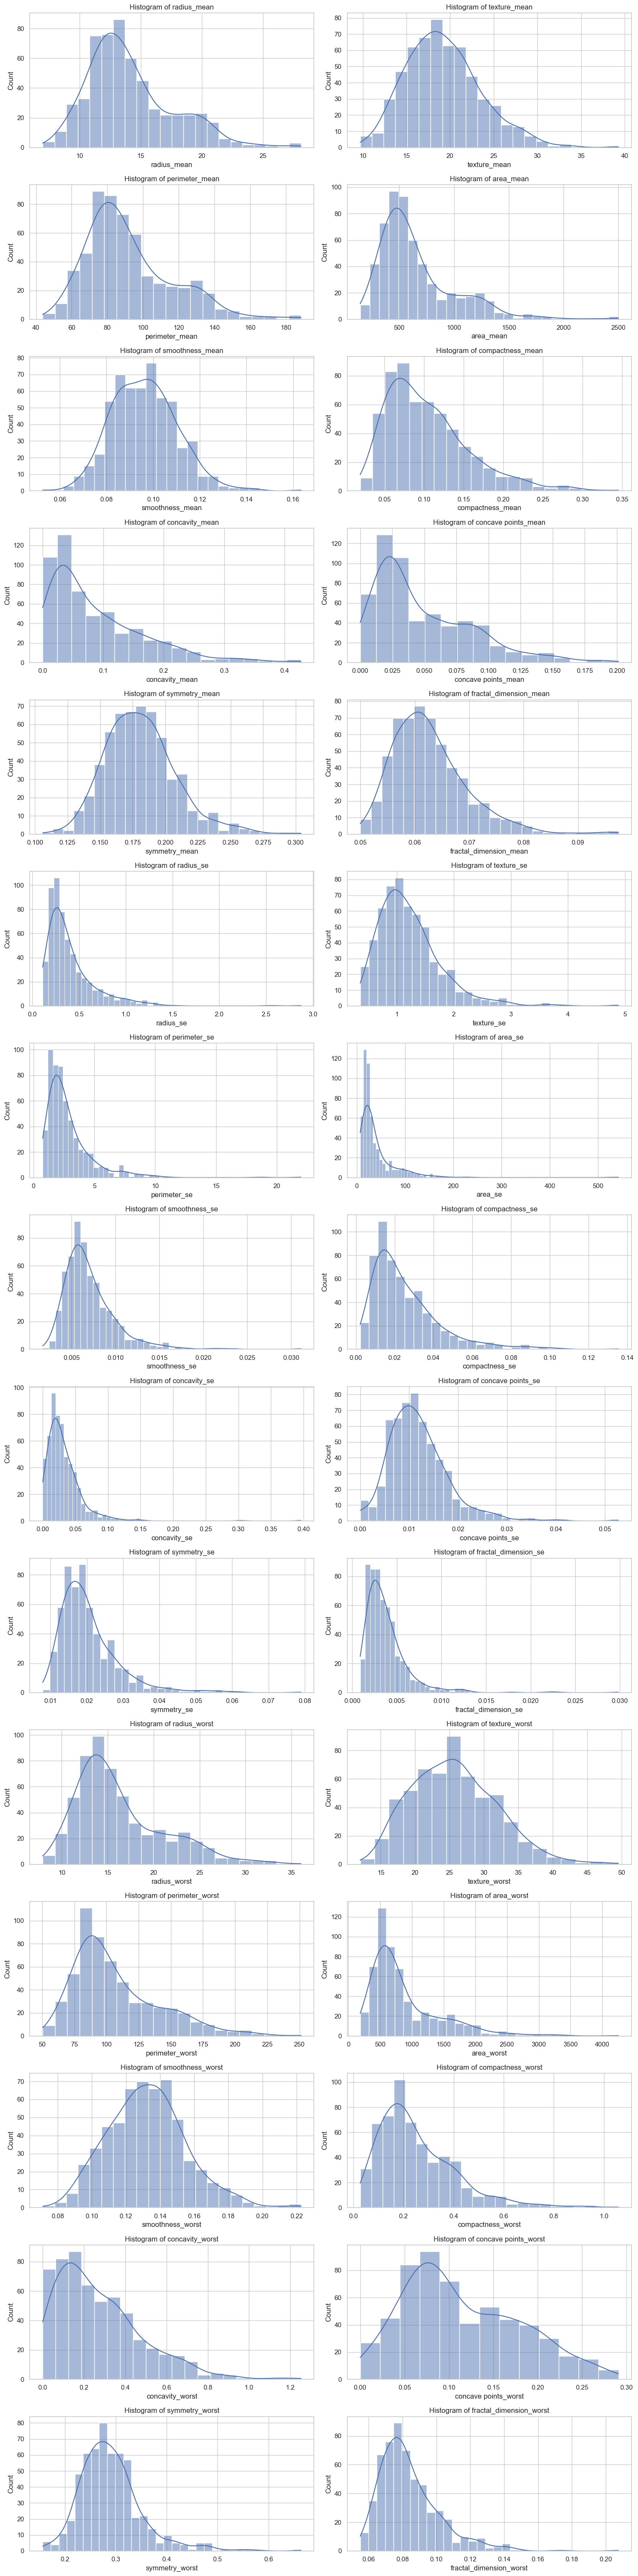

In [19]:

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Get the number of features
num_features = len(data.columns[2:])
num_rows = (num_features // 2) + (num_features % 2)  # Calculate the number of rows for subplots

# Create histograms for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))
for i, column in enumerate(data.columns[2:]):
    sns.histplot(data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

<a> Data Cleaning / Pre-processing </a>

In [20]:
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Get value counts for each column
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"\nValue counts for {column}:")
    print(value_counts)

Original DataFrame:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     sm

In [21]:
X = data.drop(['id', 'diagnosis'], axis=1)  # Features
y = data['diagnosis']  # Target variable


In [22]:
# Convert the target variable to binary (0 for benign, 1 for malignant)
y = np.where(y == 'M', 1, 0)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
# Standardize and normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [26]:
# Normalize the features using .transform(X_test_scaled)Min-Max scaling
scaler_minmax = MinMaxScaler()
X_train_smote_normalized = scaler_minmax.fit_transform(X_train_smote)
X_test_normalized = scaler_minmax

In [27]:
# Reshape the data for CNN (assuming 2D data)
X_train_cnn = X_train_smote_normalized.reshape(X_train_smote_normalized.shape[0], X_train_smote_normalized.shape[1], 1)
X_test_cnn = X_test_normalized.reshape(X_test_normalized.shape[0], X_test_normalized.shape[1], 1)


<a>Model Training</a>

<h3>Deep Neural Network (DNN) model

In [28]:
# Function to create a Deep Neural Network (DNN) model
def create_dnn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


<h3>Convolutional Neural Network (CNN) model

In [29]:

# Function to create a Convolutional Neural Network (CNN) model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


<b><i>Createing Model

In [30]:

# Create DNN model
dnn_model = create_dnn_model(X_train_smote_normalized.shape[1])


In [31]:

# Create CNN model
cnn_model = create_cnn_model(X_train_cnn.shape[1:])

<b><i>Training Models

In [32]:
# Train DNN model
dnn_model.fit(X_train_smote_normalized, y_train_smote, epochs=10, batch_size=32, validation_split=0.2, verbose=0)


In [33]:
# Train CNN model
cnn_model.fit(X_train_cnn, y_train_smote, epochs=10, batch_size=32, validation_split=0.2, verbose=0)


<b><i>Model Evauation

In [34]:
# Evaluate DNN model
y_pred_dnn_prob = dnn_model.predict(X_test_normalized)
y_pred_dnn = (y_pred_dnn_prob > 0.5).astype(int)  # Applying a threshold (adjust as needed)

print("DNN Accuracy:", accuracy_score(y_test, y_pred_dnn))
print("DNN Precision:", precision_score(y_test, y_pred_dnn))
print("\nClassification Report for DNN:\n", classification_report(y_test, y_pred_dnn))


4/4 [==============================] - 0s 2ms/step
DNN Accuracy: 0.9649122807017544
DNN Precision: 0.9534883720930233

Classification Report for DNN:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [35]:
# Evaluate CNN model
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)  # Applying a threshold (adjust as needed)

print("\nCNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print("CNN Precision:", precision_score(y_test, y_pred_cnn))
print("\nClassification Report for CNN:\n", classification_report(y_test, y_pred_cnn))


4/4 [==============================] - 0s 4ms/step

CNN Accuracy: 0.956140350877193
CNN Precision: 0.9318181818181818

Classification Report for CNN:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [37]:
# Evaluate DNN model
y_pred_dnn_prob = dnn_model.predict(X_test_normalized)
y_pred_dnn = (y_pred_dnn_prob > 0.5).astype(int)

# Evaluate CNN model
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)

# Calculate metrics for DNN
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn)

# Calculate metrics for CNN
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)

# Print the results
print("DNN Accuracy:", accuracy_dnn)
print("DNN Precision:", precision_dnn)
print("\nCNN Accuracy:", accuracy_cnn)
print("CNN Precision:", precision_cnn)

4/4 [==============================] - 0s 2ms/step
DNN Accuracy: 0.9649122807017544
DNN Precision: 0.9534883720930233

CNN Accuracy: 0.956140350877193
CNN Precision: 0.9318181818181818


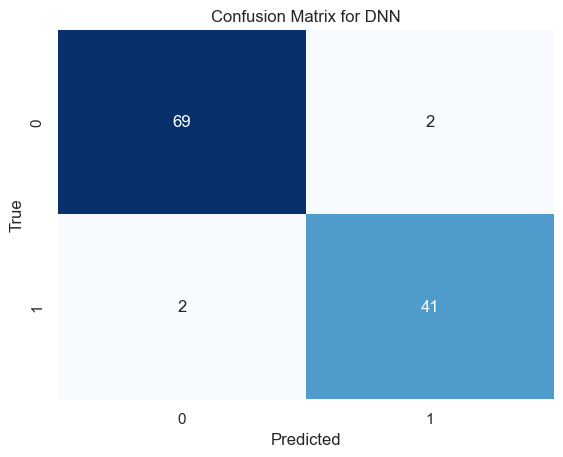

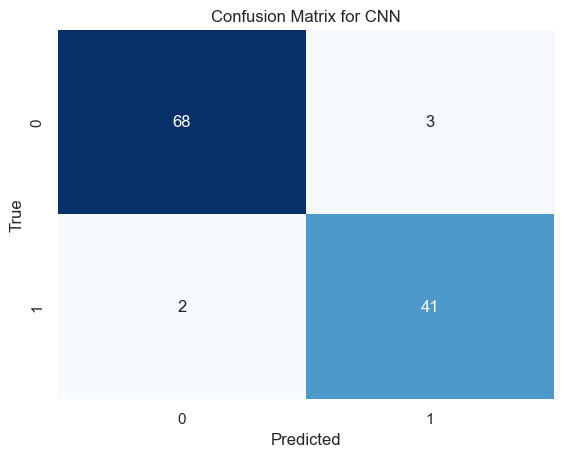

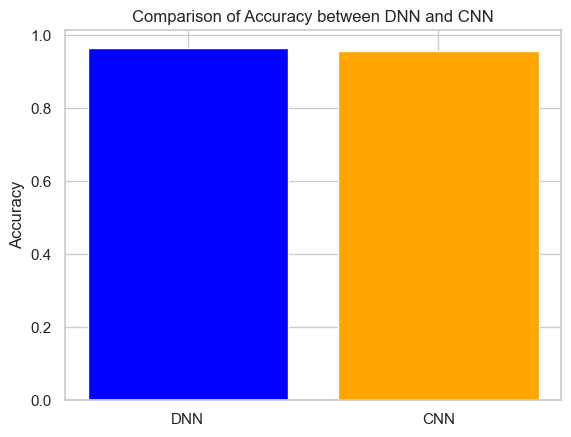

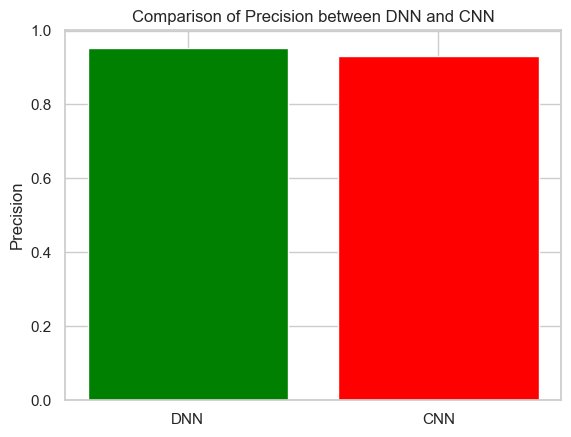

In [38]:

# Confusion Matrix for DNN
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
sns.heatmap(cm_dnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for DNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Comparison Bar Chart for Accuracy
models = ['DNN', 'CNN']
accuracies = [accuracy_dnn, accuracy_cnn]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('Comparison of Accuracy between DNN and CNN')
plt.ylabel('Accuracy')
plt.show()

# Comparison Bar Chart for Precision
precisions = [precision_dnn, precision_cnn]

plt.bar(models, precisions, color=['green', 'red'])
plt.title('Comparison of Precision between DNN and CNN')
plt.ylabel('Precision')
plt.show()

<a>Saving The Trained Models

In [39]:
# Save the CNN model as a TensorFlow SavedModel
cnn_model.save('saved_model/cnn_model')


INFO:tensorflow:Assets written to: saved_model/cnn_model\assets


INFO:tensorflow:Assets written to: saved_model/cnn_model\assets


In [40]:
# Load the CNN model from the SavedModel
loaded_cnn_model = tf.keras.models.load_model('saved_model/cnn_model')